# Programmatic Data Wrangling - Project

## <u>Introduction</u>  

**Main Points of Analysis:**  

* Genre Analysis - Revenue, Vote Average, Popularity
<br>

* Correlation Between Budget and Revenue  
<br>

    * Outliers
    
    <br> 

* Focused analysis on Paranormal Activity and Avatar

### <u>Importing Libraries and Files</u>

In [1]:
# Importing libaries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Used in data cleaning section
import ast

In [2]:
# Importing data

# Link to pathway
movies_dataset = 'TMDB_movies.csv'

# Reading the file into a dataframe
df = pd.read_csv(movies_dataset)

In [3]:
# Overview of dataset
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### <u>Data Cleaning</u>

In [4]:
# First we create a copy of the dataframe to work with
df_copy = df.copy()
df_copy.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Remove columns that won't be used in analysis:**

In [5]:
df_copy.drop(columns = ['homepage', 'original_language', 'overview', 'keywords', 'tagline'], inplace = True)

**Convert genre column to display genre names as a list:**  

In [6]:
df_copy['genre_name'] = [sorted(set([y['name'] for y in x])) for x in df_copy['genres'].apply(ast.literal_eval)]

**Add release_year and profit columns:**

In [7]:
# We can add a new column (release_year) to df_copy which extracts the year from the release_date column
# The datatype is object, so we can just index the first 4 characters from each entry
df_copy['release_year'] = df_copy.release_date.str[0:4]

In [8]:
# Add a new column (profit) which calculates revenue - budget
df_copy['profit'] = df_copy.revenue - df_copy.budget

**Removes rows with 0 in budget or revenue columns as these are assumed to be errors or represent missing data:**

In [9]:
# Select the rows which have revenue > 0 AND budget > 0
df_copy = df_copy[(df_copy['revenue'] > 10) & (df_copy['budget'] > 10)]

**Check nulls:**

In [10]:
# We can check how many nulls are in each column.
df_copy.isnull().sum()

budget                  0
genres                  0
id                      0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
genre_name              0
release_year            0
profit                  0
dtype: int64

In [11]:
# There are no more nulls in the columns that we are going to use.

### <u>Data Exploration</u>

First, I wanted to explore which films brought in the highest revenue and profit.

In [12]:
# Order films by revenue descending
# Display top 5 rows
# Only select title, revenue and genre_name columns

df_copy.sort_values('revenue', ascending = False).head(5)[['title', 'revenue', 'genre_name']]

,title,revenue,genre_name
0,Avatar,2787965087,"[Action, Adventure, Fantasy, Science Fiction]"
25,Titanic,1845034188,"[Drama, Romance, Thriller]"
16,The Avengers,1519557910,"[Action, Adventure, Science Fiction]"
28,Jurassic World,1513528810,"[Action, Adventure, Science Fiction, Thriller]"
44,Furious 7,1506249360,[Action]


In [13]:
df_copy.sort_values('profit', ascending = False).head(5)[['title', 'profit', 'genre_name']]

,title,profit,genre_name
0,Avatar,2550965087,"[Action, Adventure, Fantasy, Science Fiction]"
25,Titanic,1645034188,"[Drama, Romance, Thriller]"
28,Jurassic World,1363528810,"[Action, Adventure, Science Fiction, Thriller]"
44,Furious 7,1316249360,[Action]
16,The Avengers,1299557910,"[Action, Adventure, Science Fiction]"


> Avatar was the film that generated the most revenue.  
> The genres of Avatar are Action, Adventure, Fantasy, and Science Fiction.   

> It seems that films which have Action and/or Adventure as a genre make up most of the highest revenue-earning and profit-earning films.

Following from this, we can perform some analysis on revenue by genre.

In [14]:
# First, explode the genre_name column that we created
# Enables us to group by genre
# Save to new dataframe to not affect other plots

genre_df = df_copy.explode('genre_name')

In [15]:
# Group by genre
# Select out the revenue column
# Calculate the sum (total) revenue for each genre
# Sort the values in descending order (highest revenue first)
# Use .index to return the genre names in order, instead of the total revenue values

total_revenues = genre_df.groupby('genre_name')['revenue'].sum().sort_values(ascending = False).index

# Now we can use this to sort the bars in the bar plot

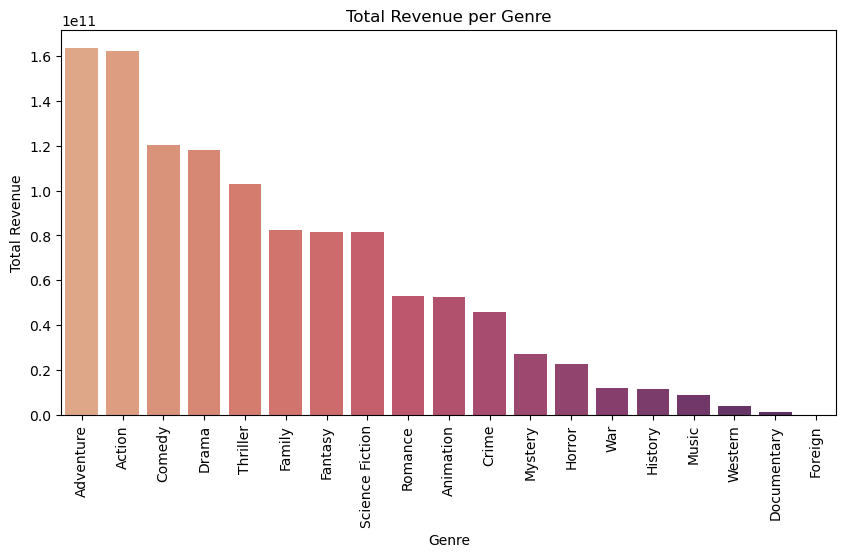

In [16]:
# Set the size of the graph
plt.figure(figsize = (10,5))

# Plot revenue against genre
sns.barplot(x = 'genre_name',
            y = 'revenue', 
            data = genre_df,
            estimator = sum,         # calculate total revenue for each genre
            ci=None,                 # remove error bars for cleaner visualisation
            palette = 'flare',       # set colour palette for the bars
            order = total_revenues   # order by revenue descending
           )

# Label the graph
plt.title('Total Revenue per Genre')

# Label the x axis
plt.xlabel('Genre')

# Label the y axis
plt.ylabel('Total Revenue')

# Format the column labels so that they are visible
plt.xticks(rotation = 90,
           fontweight = 'light',
           fontsize = 'medium'
          )


# Show graph without extra info
plt.show()

> We can see that the 'Adventure' genre brings in the highest revenue, with 'Action' closely behind. 
> 'Foreign' brings in the least revenue, with 'Documentary' closely behind.   

Now we can look at average vote per genre, and average popularity per genre.

In [17]:
# Group by genre
# Select the popularity column and calculate the average
# Round to 1 decimal place
# Order by popularity descending

genre_df.groupby('genre_name')[['popularity']].mean().round(1).sort_values('popularity', ascending = False)

,popularity
genre_name,
Animation,46.3
Adventure,45.5
Science Fiction,43.4
Fantasy,43.0
Action,37.3
Family,36.4
Thriller,30.8
Mystery,29.9
Crime,28.0


> Adventure and Animation are at the top, with Documentary and Foreign at the bottom.  
> This could indicate a correlation between popularity and revenue, since the order of genres is similar.

In [18]:
# Group by genre
# Select vote_average column and calculate the average
# Round to 1 decimal place
# Order by vote_average descending

genre_df.groupby('genre_name')[['vote_average']].mean().round(1).sort_values('vote_average', ascending = False)

,vote_average
genre_name,
History,6.8
War,6.8
Documentary,6.8
Western,6.7
Drama,6.6
Music,6.5
Romance,6.4
Mystery,6.4
Foreign,6.4


> Documentaries have one of the highest vote_averages, while Action and Adventure are much further down.

___
**Key Point 1:**   
The Adventure genre had the highest revenue, while Documentary had one of the lowest.  
However, when looking at the average vote_average per genre, Documentary has one of the highest.  
This indicates that Documentary films are not very popular but those who watch them do enjoy them.
___

Next we can look at total budget per genre:

In [19]:
# Group by genre
# Select budget column and calculate the sum (total)
# Display in descending order

genre_df.groupby('genre_name')[['budget']].sum().sort_values('budget', ascending = False)

,budget
genre_name,
Action,57274526472
Adventure,50825869043
Drama,43263805724
Comedy,40132554938
Thriller,38291925399
Science Fiction,27072855057
Fantasy,25869195826
Family,24908238206
Crime,18107209357


> When looking at total budget, the order of genres is similar to that of total revenue. It seems that there is a correlation between these columns.  
> So we can create a correlation matrix to visualise this.

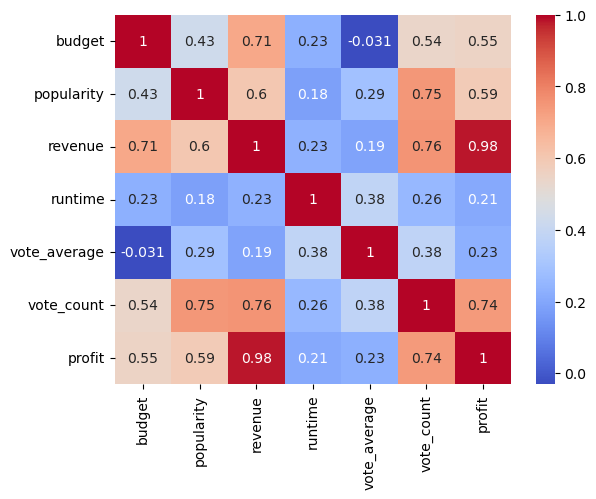

In [20]:
# Calculate the correlation matrix for the columns listed
# Plot as a heatmap

sns.heatmap(data = df_copy[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'profit']].corr(), 
            cmap = 'coolwarm', # Set colour scheme
            annot = True)      # Display the correlation coefficients

# Display the heatmap
plt.show()

> We can see that budget and revenue have quite a strong positive correlation of 0.71, indicating that a higher budget does typically lead to a higher revenue, as suspected. 

We can also plot a scatter graph of budgets vs revenue, to see if there are any obvious outliers.


In [21]:
# Too many data points to plot (graph is hard to read), so focusing on films made from 2007 onwards
# Cast the release_year column as type float to enable '>2007' comparison
# Select the rows which have release_year > 2007
# Save as recent_films
recent_films = df_copy[df_copy['release_year'].astype(float)>2007 ]

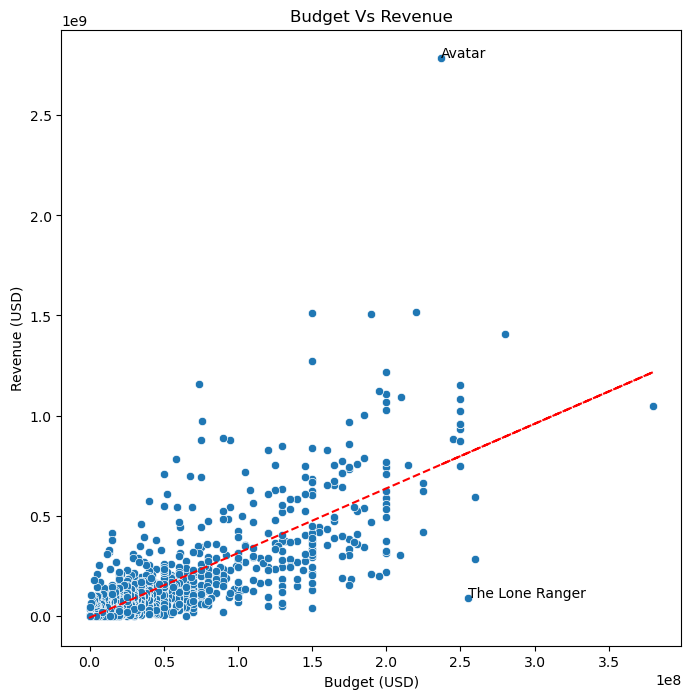

In [22]:
# Set the size of the graph to 8x8
plt.figure(figsize = (8,8))

# Scatterplot of budget against revenue
sns.scatterplot(data = recent_films, 
                x = 'budget', 
                y = 'revenue'
               )

### Add a trend line
# Code sourced from the link below:
# https://saturncloud.io/blog/how-to-draw-a-scatter-trend-line-on-matplotlib-using-python-pandas/#:~:text=To%20add%20a%20trend%20line,straight%20line%20to%20the%20data.)
z = np.polyfit(recent_films['budget'], recent_films['revenue'], 1)
p = np.poly1d(z)
plt.plot(recent_films['budget'], p(recent_films['budget']), 'r--')

# Label the graph
plt.title('Budget Vs Revenue')

# Label the x and y axis
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')

### Label specific points - Avatar and Lone Ranger:

# Save the 'Avatar' row as a series in the variable 'avatar'
avatar = df_copy[df_copy['title'] == 'Avatar'].iloc[0]

# Save the 'Lone Ranger' row as a series in the variable 'lr'
lr = df_copy[ df_copy['title'] == 'The Lone Ranger' ].iloc[0]

plt.text(avatar['budget'],    # locate x coordinate of avatar
         avatar['revenue'],   # locate y coordinate of avatar
         avatar['title'],     # display the title ('Avatar') at these coordinates
         fontsize=10)         # set fontsize

plt.text(lr['budget'],        # locate x coordinate of lr
         lr['revenue'],       # locate y coordinate of lr
         lr['title'],         # display the title ('Avatar') at these coordinates
         fontsize=10)         # set fontsize

# Show graph without extra info
plt.show()

> It seems that there is a positive correlation between budget and revenue, meaning that the higher the budget for the film, the higher the revenue it generates.  

> However, it looks like there are a few 'outliers' present:  
> For example, The Lone Ranger has a high budget, but very low revenue.

We can identify more outliers to see which films have a high revenue:budget ratio.

In [23]:
# Calculate revenue/budget to get ratio
# Round to 1 decimal place
# Save as a new column, 'ratio', in the df_copy dataframe.
df_copy['ratio'] = round(df_copy['revenue'] / df_copy['budget'])

# Order by films which have the highest ratio (i.e. high revenue, low budget)
# Only select the title and ratio columns to return
df_copy[['title', 'ratio']].sort_values('ratio', ascending = False).head(3)

,title,ratio
4577,Paranormal Activity,12890.0
4582,Tarnation,5330.0
4496,The Blair Witch Project,4133.0


> Paranormal Activity had the highest revenue:budget ratio, meaning that it generated a very high revenue in comparison to its budget.

---

**Key Point 2**: There is a strong positive correlation between budget and revenue, but some films are 'outliers' e.g. have high budget and low revenue (The Lone Ranger), or low budget and high revenue (Paranormal Activity).

--- 

## <u>In-Depth Movie Analysis</u>

### **Movie 1: Paranormal Activity 2007**  

<div>
    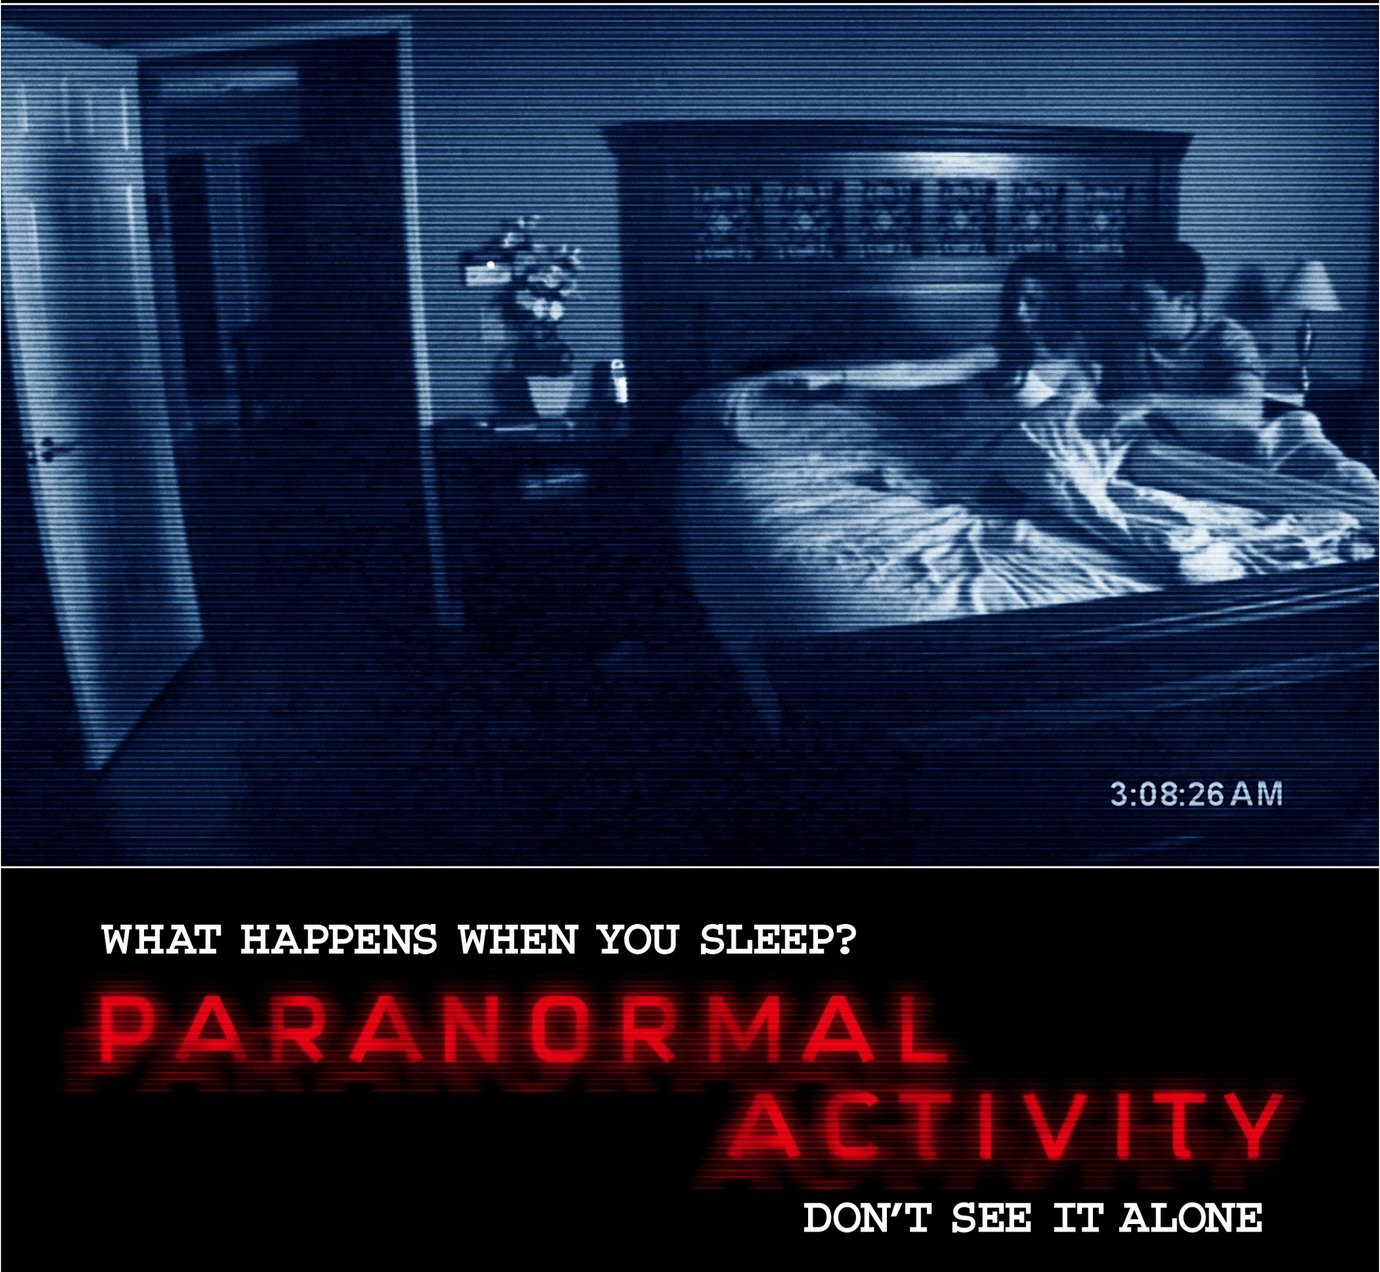
</div>

**As mentioned, Paranormal Activity has a very high revenue:budget ratio, meaning that it generated a very high revenue in comparison to the budget.**

In [24]:
# Select the budget and revenue columns for title = Paranormal Activity
df_copy[df_copy['title'] == 'Paranormal Activity'][['budget', 'revenue']]

,budget,revenue
4577,15000,193355800


> We can see that Paranormal Activity had a very low budget of 15,000, but generated a revenue of 193 million.  
> It had the highest revenue:budget ratio, 12890.  

First, we can compare it with other horror films to see how it performed in this genre.

In [25]:
# Select the films that have genre = Horror
# Save these rows to the dataframe horror_films
horror_films = genre_df[genre_df['genre_name'] == 'Horror']

# Sort the horror films by budget descending
# Display only title and budget columns
# Display the top 6 rows
horror_films.sort_values('budget', ascending = True)[['title', 'budget']].head(3)

,title,budget
4724,Eraserhead,10000
4788,Pink Flamingos,12000
4577,Paranormal Activity,15000


> Paranormal Activity had the 3rd lowest budget in the Horror genre.  

In [26]:
# Calculate the average popularity for horror films
# Round to 1 decimal place
round(horror_films.popularity.mean(), 1)

24.8

> The popularity for Paranormal Activity was much higher than the average popularity for horror films (47 compared to the average of 24.8).  

<br>
Next, we can compare it to horror films produced in the same year.

In [27]:
# Select all horror films released in 2007
# Sort by popularity descending
# Only select 'title' and 'popularity' columns
# Display top 2 rows

horror_films[horror_films['release_year'] == '2007'].sort_values('popularity', ascending = False)[['title', 'popularity']].head(2)

,title,popularity
116,I Am Legend,70.867401
4577,Paranormal Activity,47.456823


In [28]:
# Select all horror films released in 2007
# Sort by profit descending
# Only select 'title' and 'profit' columns
# Display top 2 rows

horror_films[horror_films['release_year'] == '2007'].sort_values('profit', ascending = False)[['title', 'profit']].head(2)

,title,profit
116,I Am Legend,435349010
4577,Paranormal Activity,193340800


> For horror films produced in 2007, Paranormal Activity was the 2nd most popular and 2nd most profitable.  

> Overall, Paranormal Activity performed very well in comparison to other horror films despite having one of the lowest budgets.

### **Movie 2: Avatar 2009**  

<div>
    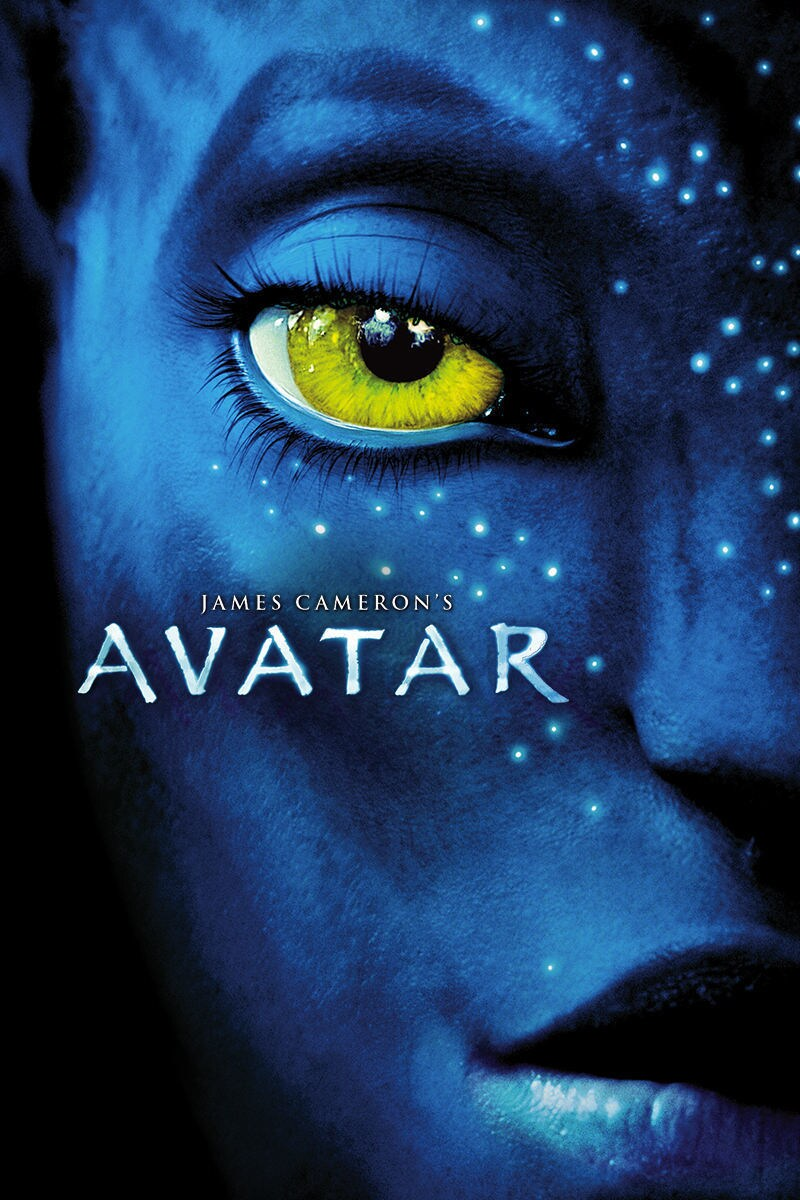
</div>  

**Avatar has the highest revenue and profit in the dataset, and it is an Adventure film which was the genre with the highest revenue.**

We can first compare Avatar with other Adventure films and investigate profit specifically.

In [29]:
# Select all rows which have adventure as genre
adventure_films = genre_df[genre_df['genre_name'] == 'Adventure']

# Sort by profit descending
# Select only title and profit columns
# Return top 5 rows
adventure_films.sort_values('profit', ascending = False)[['title', 'profit']].head()

,title,profit
0,Avatar,2550965087
28,Jurassic World,1363528810
16,The Avengers,1299557910
7,Avengers: Age of Ultron,1125403694
124,Frozen,1124219009


> We can see that Avatar earned a much higher profit than other adventure films.  
> The film with the 2nd highest profit was Jurassic World, and Avatar earned almost double the profit that Jurassic World did.   
  
  
We can check the vote_average for Adventure films:

In [30]:
adventure_films.sort_values('vote_average', ascending = False)[['title', 'vote_average']].head()

,title,vote_average
2294,Spirited Away,8.3
2247,Princess Mononoke,8.2
1990,The Empire Strikes Back,8.2
1987,Howl's Moving Castle,8.2
95,Interstellar,8.1


> Avatar placed much lower in terms of vote_average (93rd place!), so it was not rated very highly compared to other Adventure films.

Next we can compare it with the popularity of other Adventure films.

In [31]:
# Order the Adventure films by popularity, descending
# Select only the title and popularity columns
# Display top 3 rows

adventure_films.sort_values('popularity', ascending = False)[['title', 'popularity']].head(3)

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956


> Minions is the most popular adventure film, while Avatar is actually 16th.  

> So, although Avatar brought in the most revenue, profit, etc., it was not as popular in comparison to other Adventure films, and not rated as highly.

## <u>Conclusion</u>

Key Insights Discovered:
<br>  

* Documentary films earned the least revenue but had the highest vote_average.
<br>  

* Budget and revenue are positively correlated, but there are exceptions to this rule.
<br>  

* Paranormal Activity was one of the most profitable and popular horror films released in 2007.
<br>  

* Avatar brought in the most revenue but was not very popular or highly-rated compared to other Adventure films.